#**201955718 - MELIA PUTRI H - 머신러닝 Assignment 1 (APPLIED)**
From the textbook ***“Introduction to Statistical Learning”*** by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani
1. **No.9 Page 56: Auto Data**
2. **No.10 Page 56-57: Boston Housing Data**


###**0. Importing the Libraries**

In [ ]:
#Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###**1. Problem No. 9 Page 56: Auto Data**

**Attributes:**
* `mpg` : meters per gallon
* `cylinders` : number of cylinders in the engine
* `displacement` : engine displacement
* `horsepower` : horsepower of the car
* `weight` : weight of the car (in lbs)
* `acceleration`: 	acceleration of the car (most likely (s) it took the car from 0-60)
* `year` : model year of the car
* `origin` : _unknown descriptor_ (probably related to area of the manufacturer)
* `name` : name of the car

#####**Processing the Dataset**
> **Notes**: When working on point (b), finding the predictors' range, it turned out that the statistics data of `horsepower` could not be shown, so the we add `na_values='?'` to indicate the NA (Not Available) data. 

In the section, I will retrive the data from the internet, from the link that is put in the cell below:

In [ ]:
#Importing the Data Set
auto_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Auto.csv"
auto=pd.read_csv(auto_url,na_values='?')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
#Checking Missing Values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
#Dropping out the Null
auto=auto.dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


#####**(a) Which of the predictors are quantitative, and which are qualitative?**

In [ ]:
#Checking the Data Types
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


>**ANSWER**

From the result above, it turned out that we have three types of data that is shown in the column `Dtype` 
* `int64` and `float64`, is quantitative data
* `object`, is qualitative data

Thus we have `mpg`, `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `year`, and `origin` as quantitative data. Whereas, `name` is the only qualitative data. 

#####**(b) What is the *range* of each quantitative predictor?**



In [ ]:
#Showing the Statistics Description
auto_stats=auto.describe()
auto_stats

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#Using .loc to locate the MAX and MIN value (the Range) of the data
print("Range of Each Quantitative Predictors:")
auto_range=auto_stats.loc[['min','max']]
auto_range

Range of Each Quantitative Predictors:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0,1.0
max,46.6,8.0,455.0,230.0,5140.0,24.8,82.0,3.0


In [ ]:
auto_diff=auto_range.iloc[1]-auto_range.iloc[0]
print("The Difference of Each Quantitative Predictors:")
auto_diff

The Difference of Each Quantitative Predictors:


mpg               37.6
cylinders          5.0
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
origin             2.0
dtype: float64

#####**(c) What is the mean and standard deviation of each quantitative predictor?**

In [ ]:
#Using .loc to locate the MEAN and STD value (the Range) of the data
print("The Mean and Standard Deviation of Each Quantitative Predictor:")
auto_stats.loc[['mean','std']]

The Mean and Standard Deviation of Each Quantitative Predictor:


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518


#####**(d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?**

In [ ]:
#Using .drop to remove the data and use the data index to locate which data to be removed
#Index starts at 0, so the 10th data would be at the index 9 
#while to state the end of the 85th data would be at the index 85
auto_new=auto.drop(auto.index[9:85]) 
#Starts from the index 9 until before index 85, thus the index 85 data still remains
auto_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
#Showing the Statistics of Auto_New data
auto_new_stats=auto_new.describe()
auto_new_stats

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,24.404430,5.373418,187.240506,100.721519,2935.971519,15.726899,77.145570,1.601266
std,7.867283,1.654179,99.678367,35.708853,811.300208,2.693721,3.106217,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.750000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.500000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


In [ ]:
#Showing the range, mean, and standard deviation of the new data
auto_new_stats.loc[['max','min','mean','std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
mean,24.404430,5.373418,187.240506,100.721519,2935.971519,15.726899,77.145570,1.601266
std,7.867283,1.654179,99.678367,35.708853,811.300208,2.693721,3.106217,0.819910


#####**(e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.**

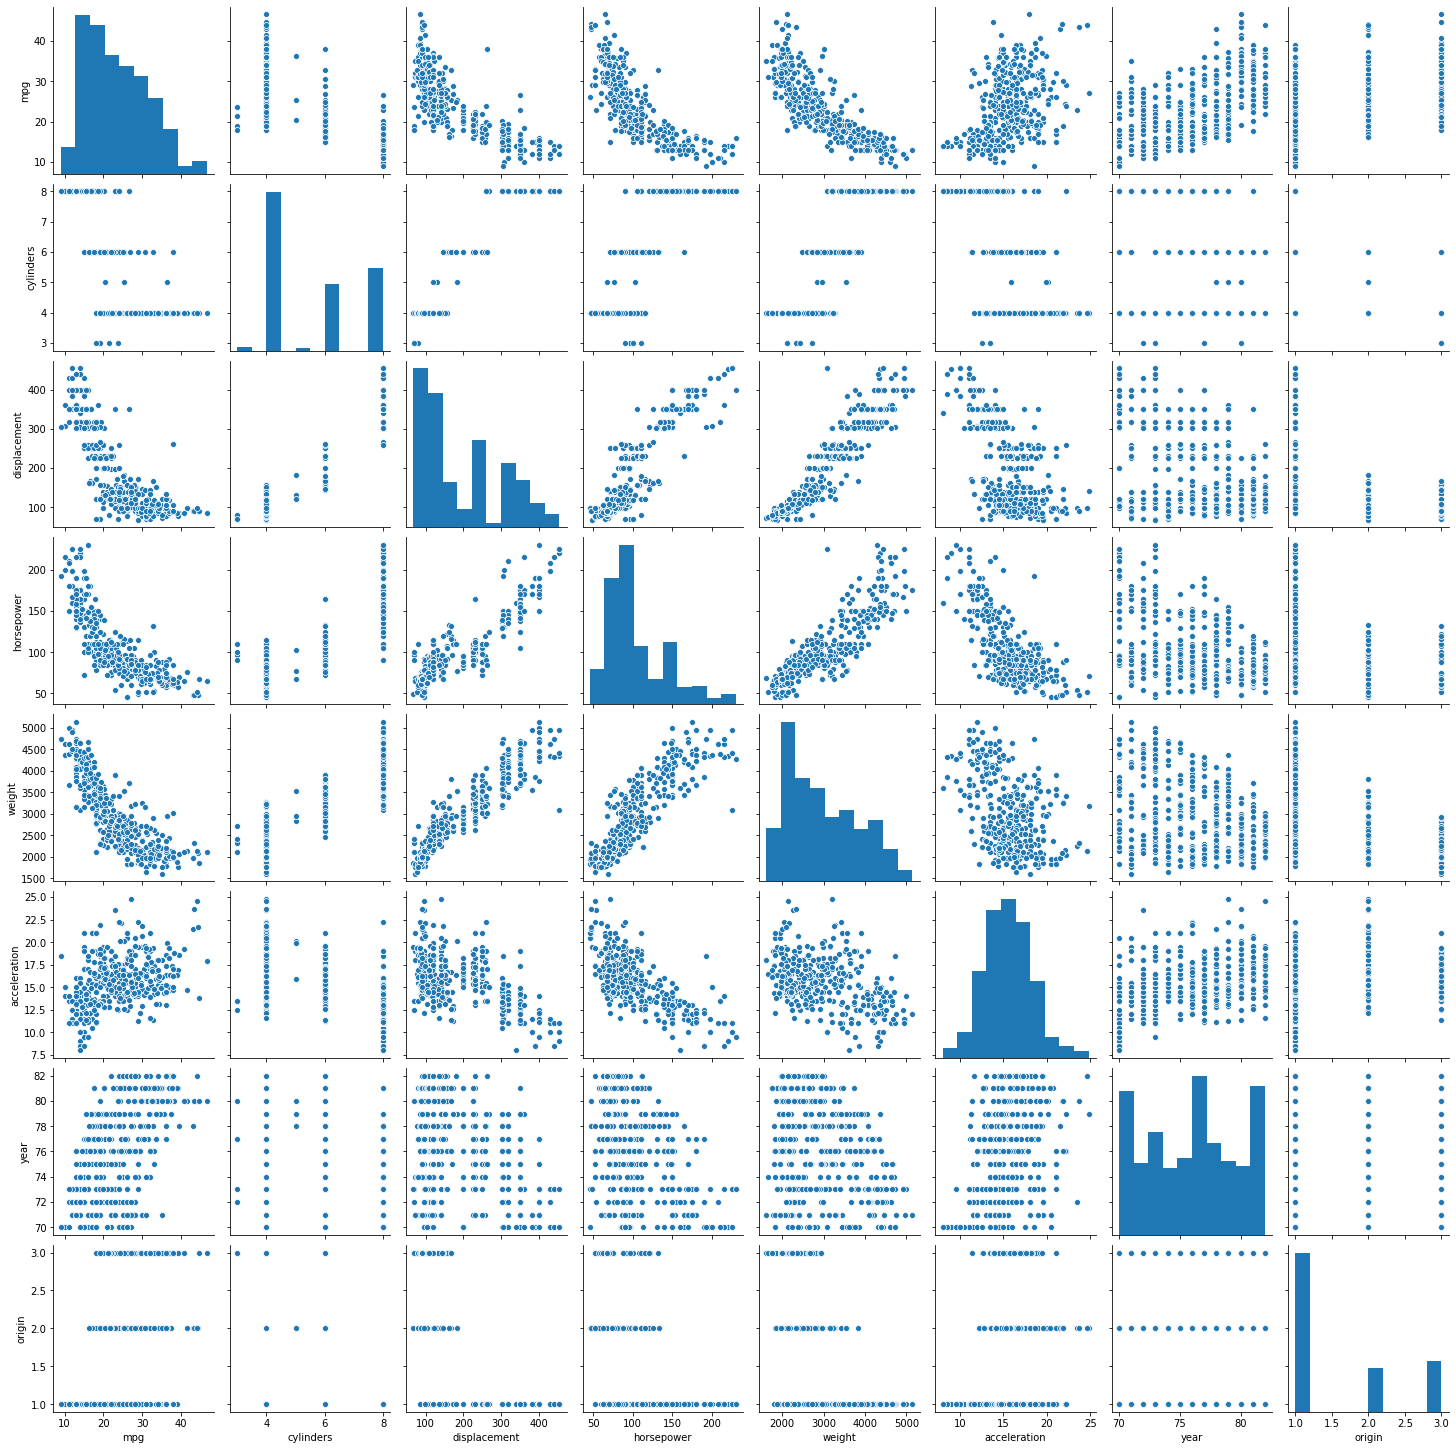

In [ ]:
#The full data set uses the variable auto
sns.pairplot(auto,palette='rocket')

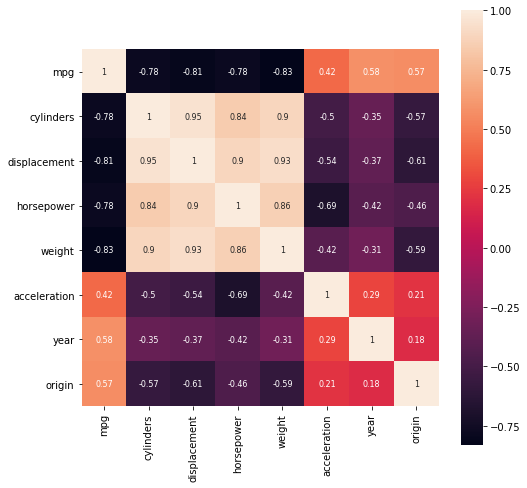

In [ ]:
#Heatmap of Auto Dataset
plt.figure(figsize=(8,8),facecolor='w')
sns.heatmap(auto.corr(),square=True,annot=True,annot_kws={"size": 8})

#####**(f) Suppose that we wish to predict gas mileage (`mpg`) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting `mpg`? Justify your answer.**

> **ANSWER**

> It is shown from the heatmap in point (e) that the predictors with correlation score with `mpg` more than 0.5 are `cylinders`, `displacement`, `horsepower`, `weight`, `year`, and `origin`. So,  let us now see the relations of those predictors with `mpg` in boxplots below:

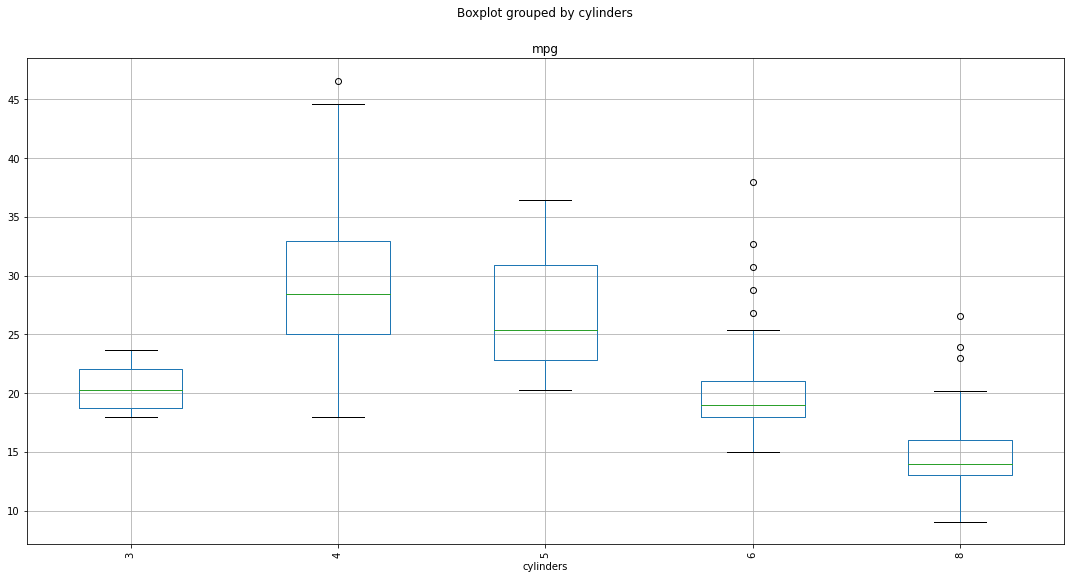

<Figure size 432x288 with 0 Axes>

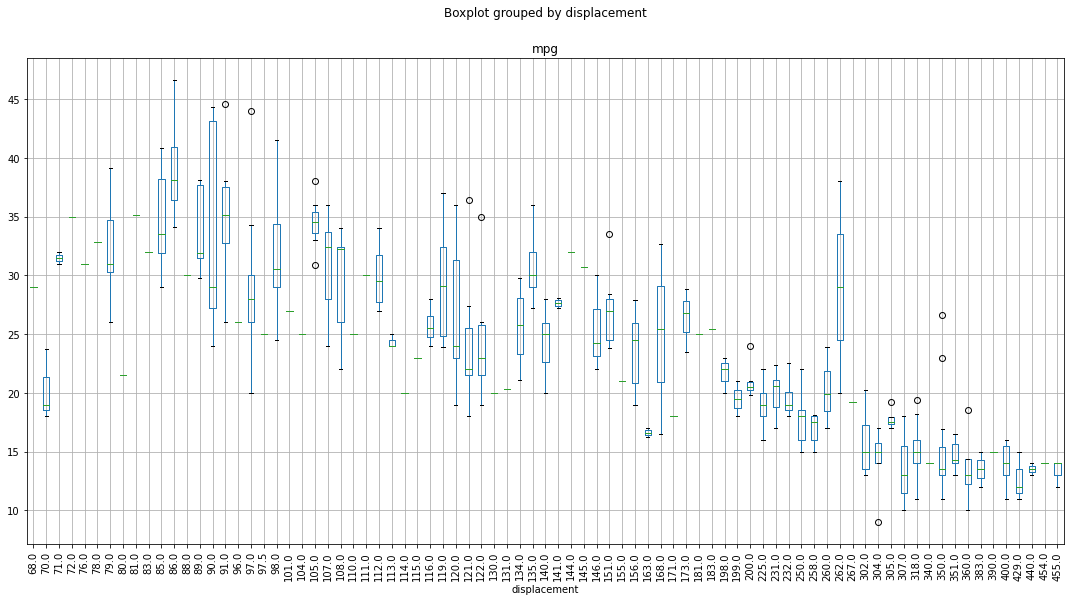

<Figure size 432x288 with 0 Axes>

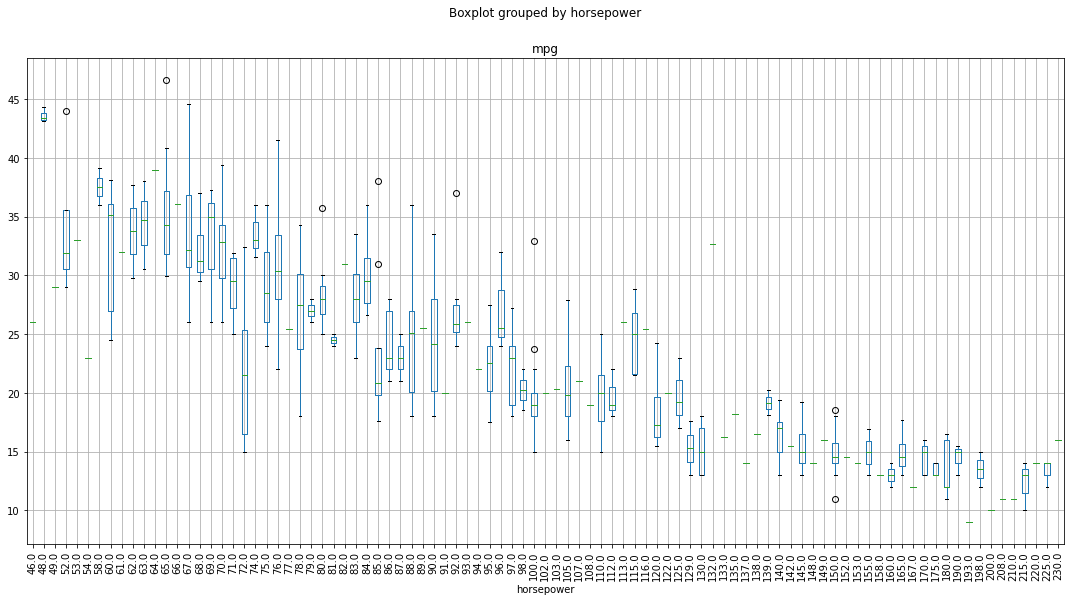

<Figure size 432x288 with 0 Axes>

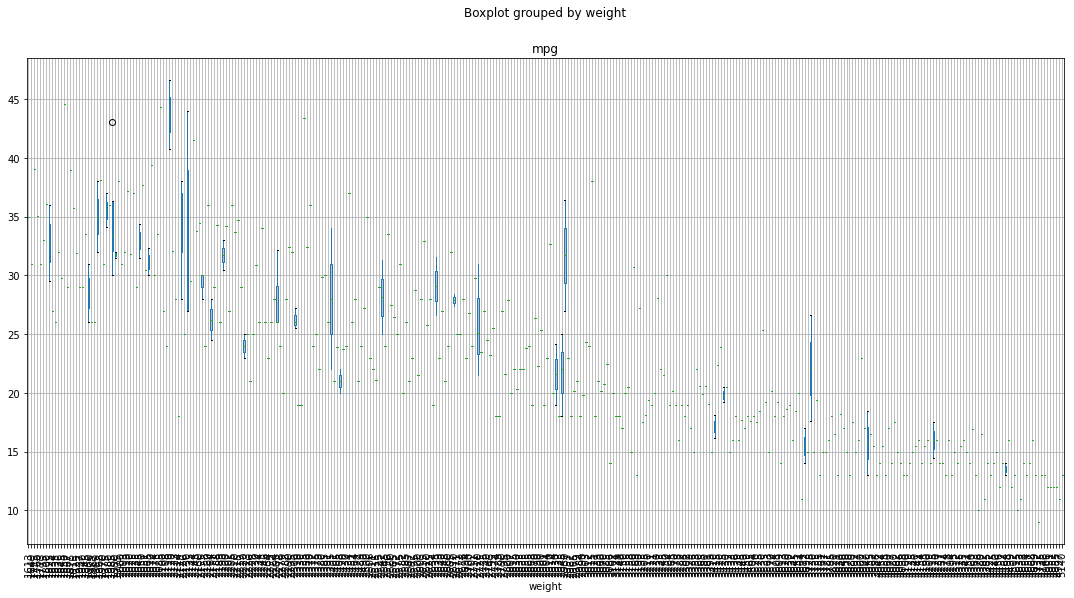

<Figure size 432x288 with 0 Axes>

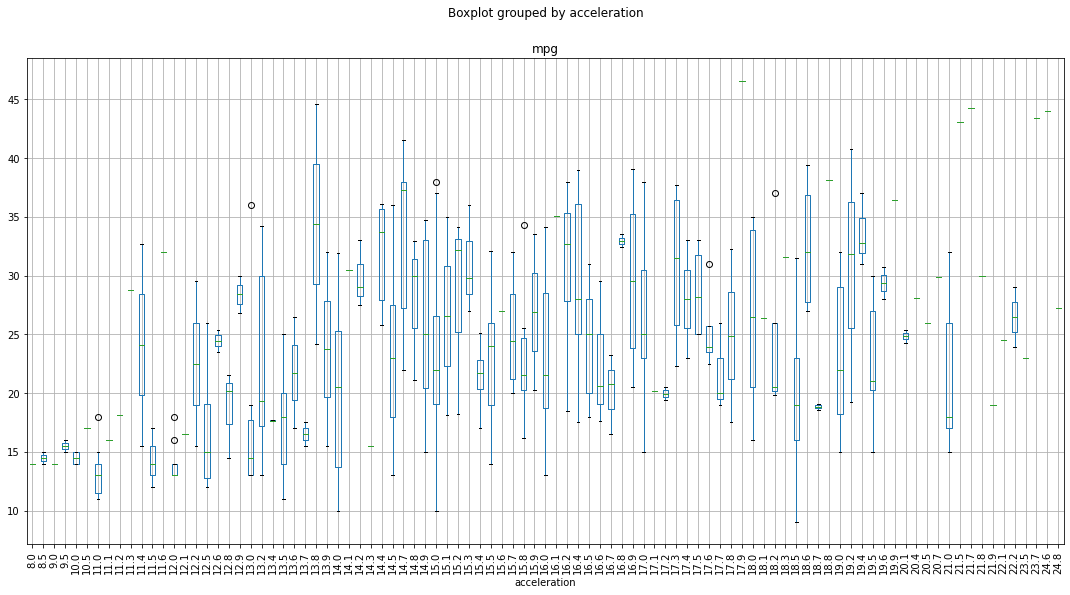

<Figure size 432x288 with 0 Axes>

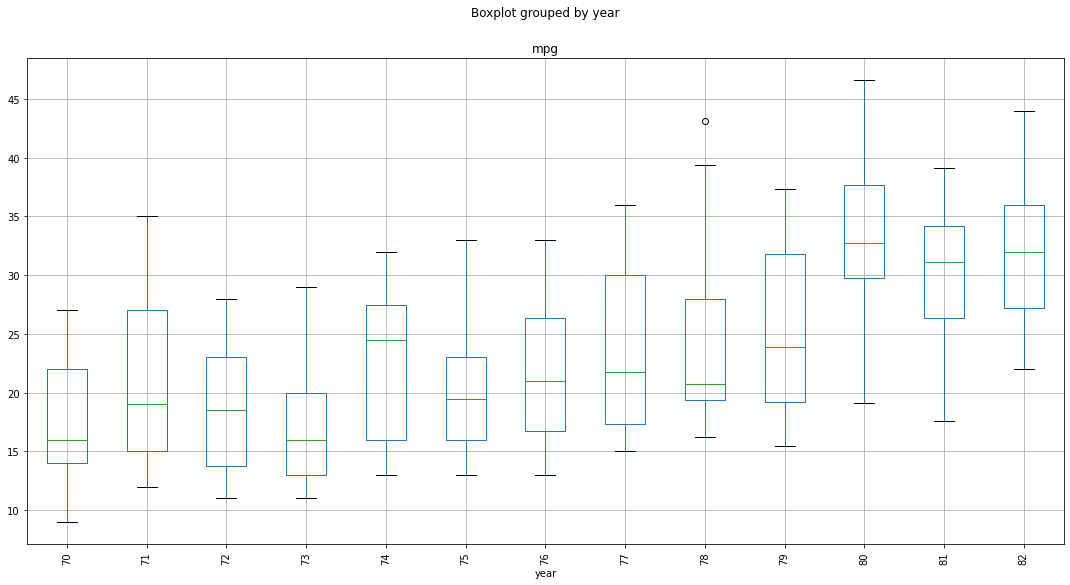

<Figure size 432x288 with 0 Axes>

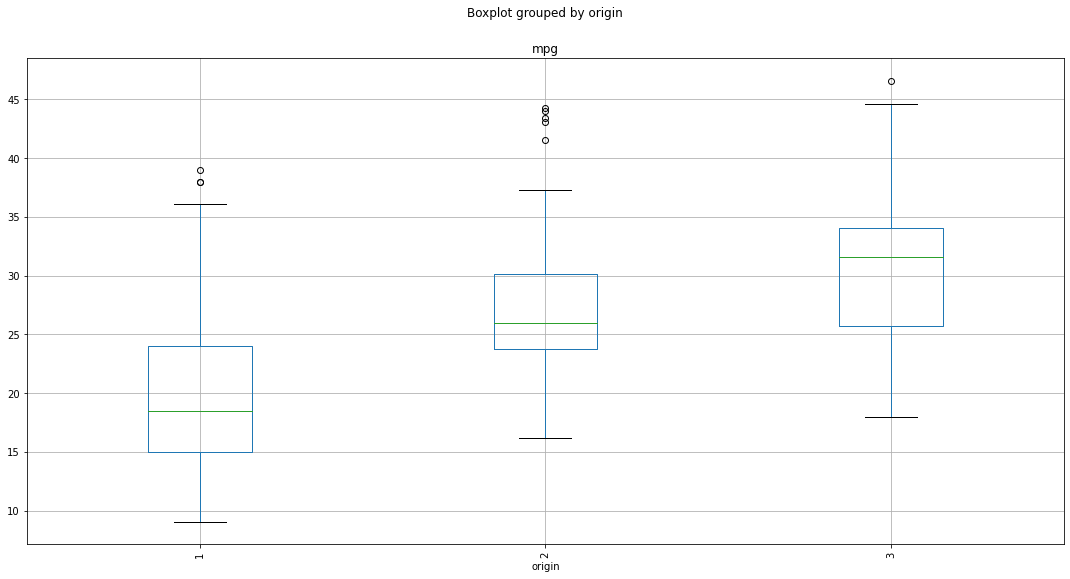

<Figure size 432x288 with 0 Axes>

In [ ]:
columns=auto[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]

for i in columns:
  auto.boxplot(column='mpg',by=i,figsize=(18,9),rot=90)
  plt.figure(facecolor='white')
  plt.show()

###**2. Problem No. 10 Page 56-57: Boston Housing Data**

**Attributes:**
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per USD10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in USD1000's

#####**(a) How many rows are in this data set? How many columns? What do the rows and columns represent?**


In [ ]:
#Importing the Data
boston_url="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston=pd.read_csv(boston_url)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The number of rows and columns can be seen when showing the data. We can see at the bottom of the table. 

**ANSWER**

Boston Housing Dataset has 506 rows and 14 columns

#####**(b) Make some pairwise scatterplots of the predictors (columns) in this data set.**

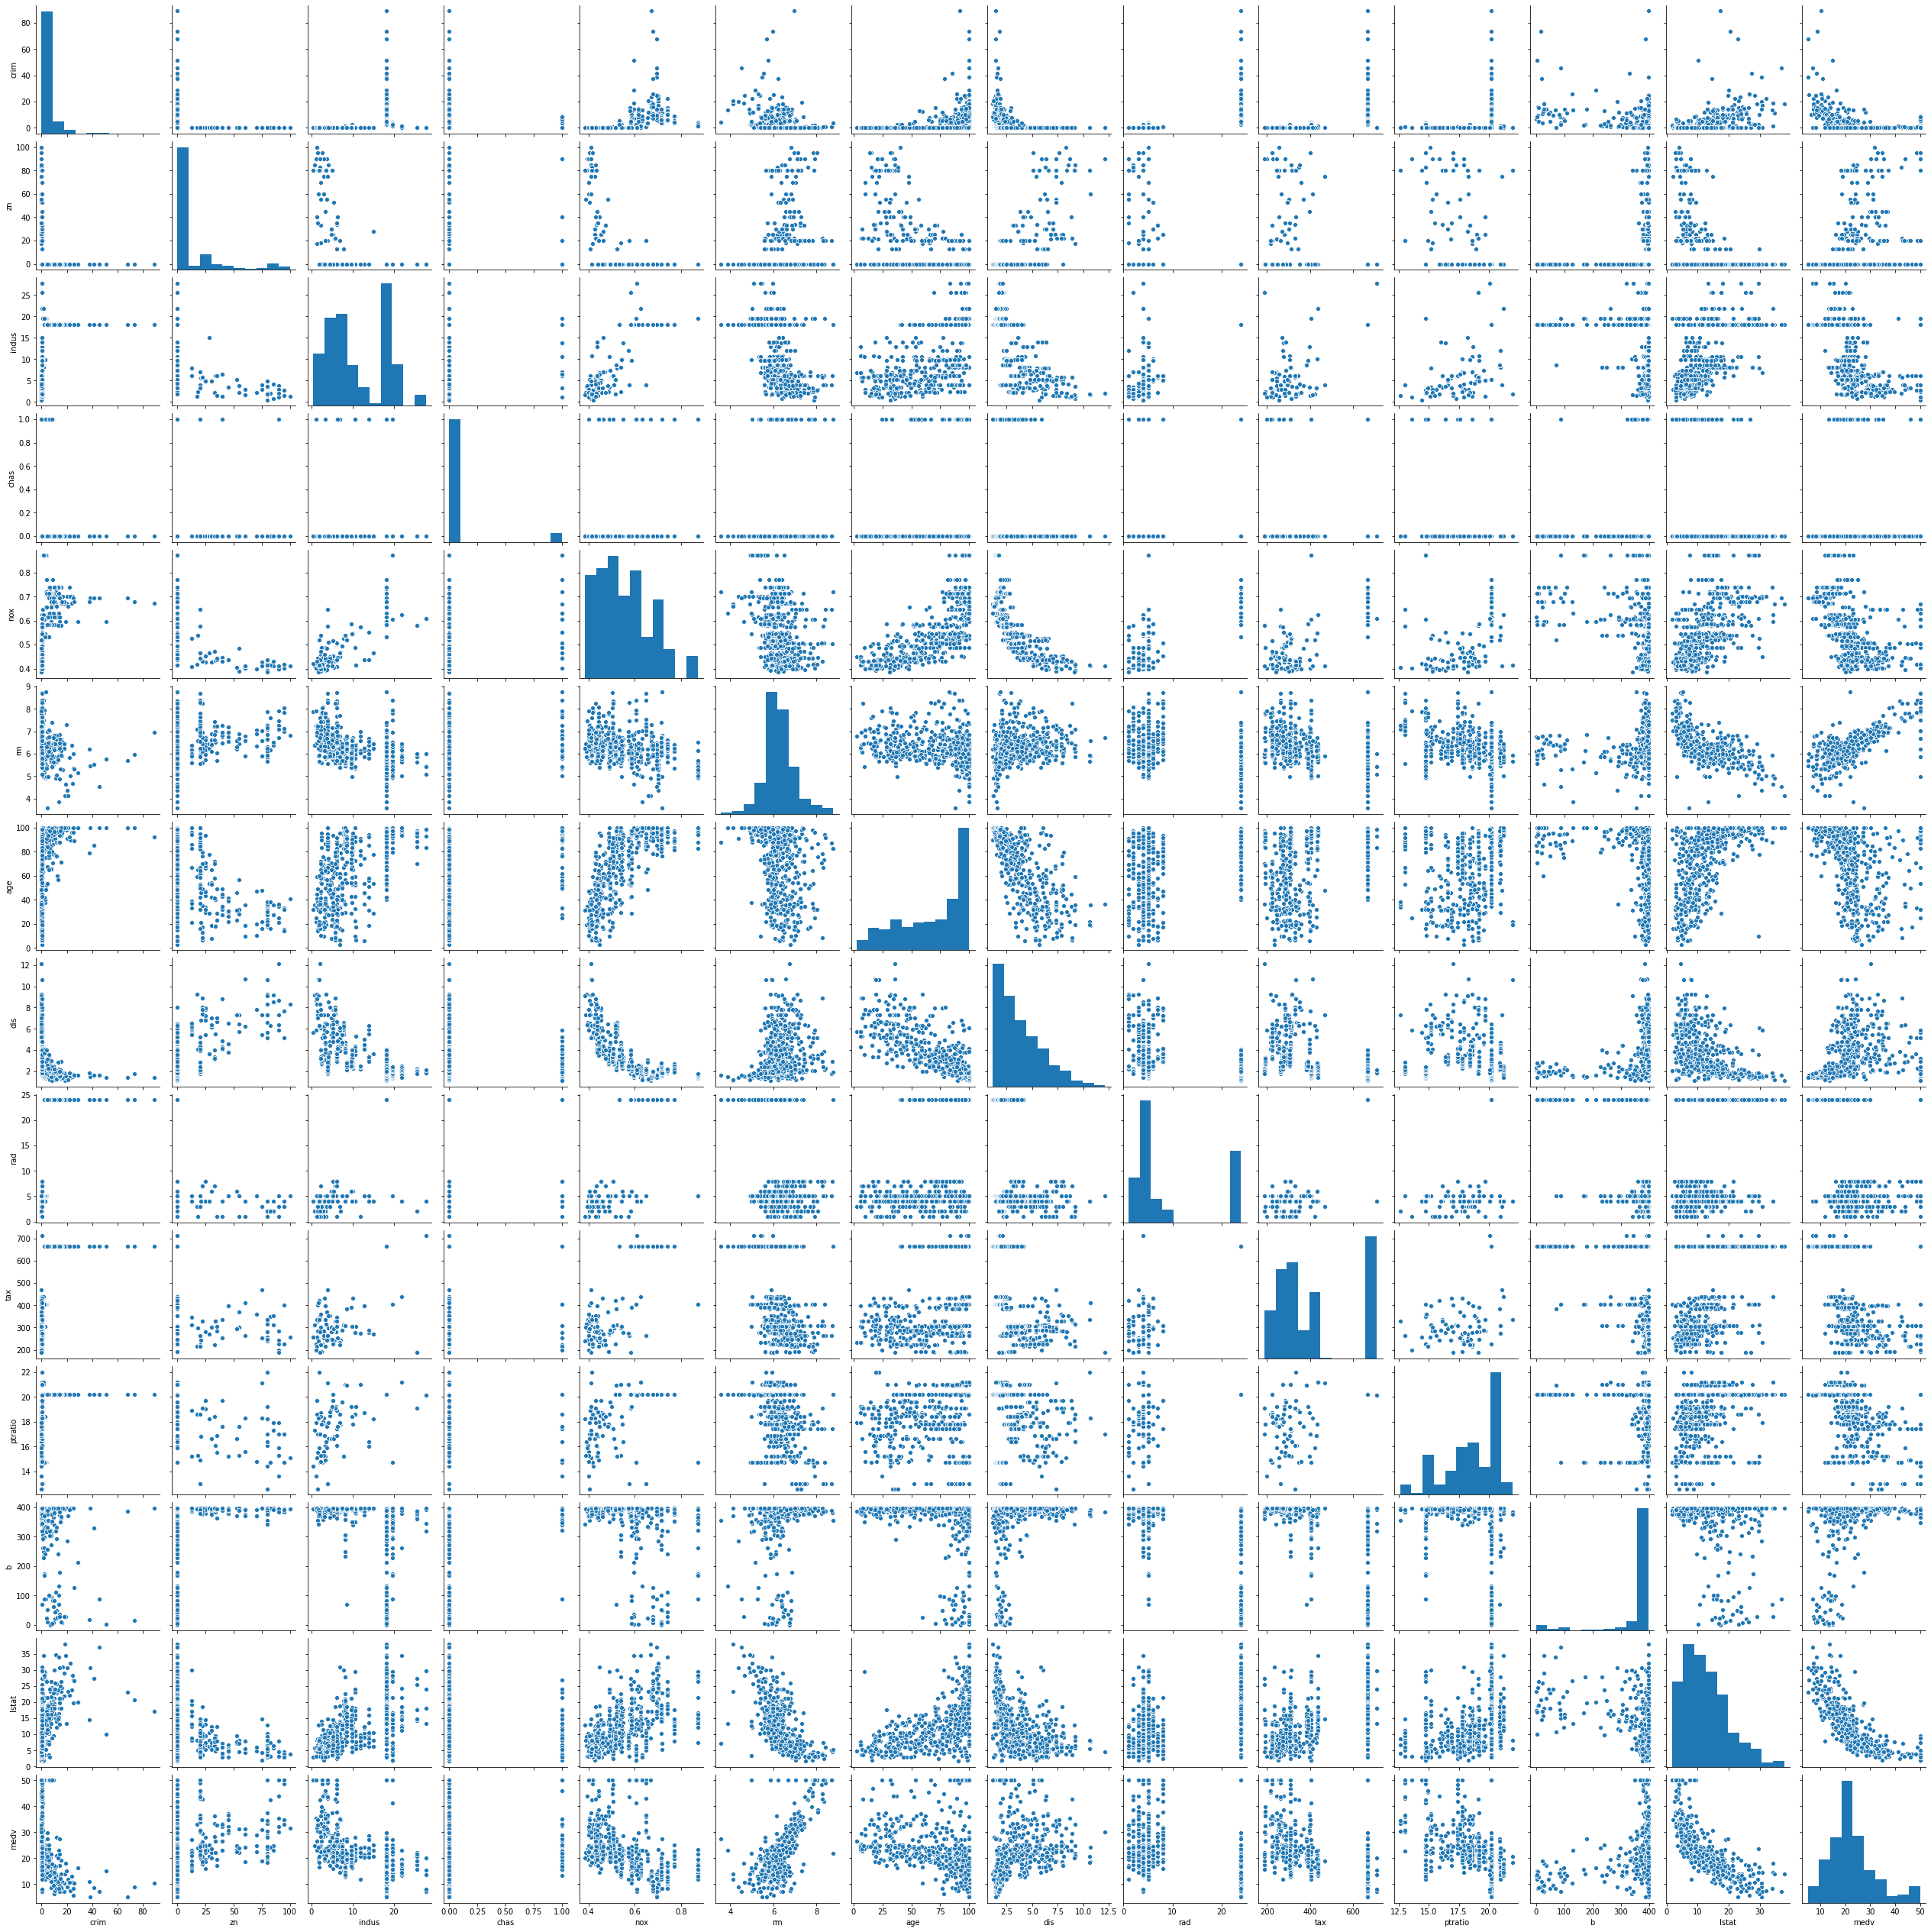

In [ ]:
#Using Seaborn Pairwise Scatterplots to plot the data
plt.rcParams['figure.facecolor']='white'
sns.pairplot(boston)

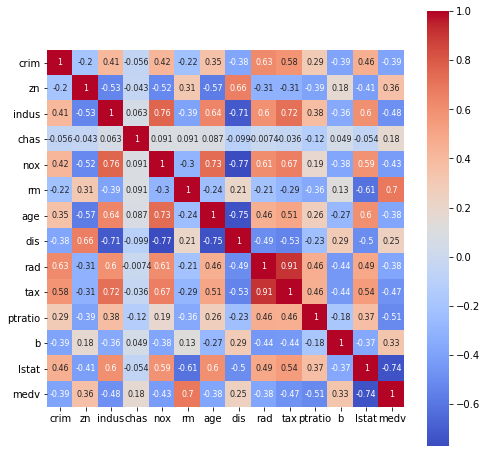

In [ ]:
corrmat=boston.corr()
plt.figure(figsize=(8,8),facecolor='w')
sns.heatmap(corrmat,square=True,cmap='coolwarm',annot=True,annot_kws={"size": 8})

#####**(c) Are any of the predictors associated with per capita crime rate? If so, explain the relationship.**

Predictors Correlation Score with CRIM Data:


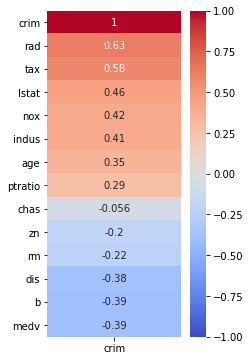

In [ ]:
print("Predictors Correlation Score with CRIM Data:")
plt.figure(figsize=(3,6))
sns.heatmap(corrmat[['crim']].sort_values(by=['crim'],ascending=False),vmin=-1,cmap='coolwarm',annot=True);

> **ANSWER**

> From the correlation score above, several predictors are correlated with CRIM.
* The `rad` has 0.63 correlation score, which may indicates that index of accessibility to radial highways may associated with a suburb's criminal rate, and so on.

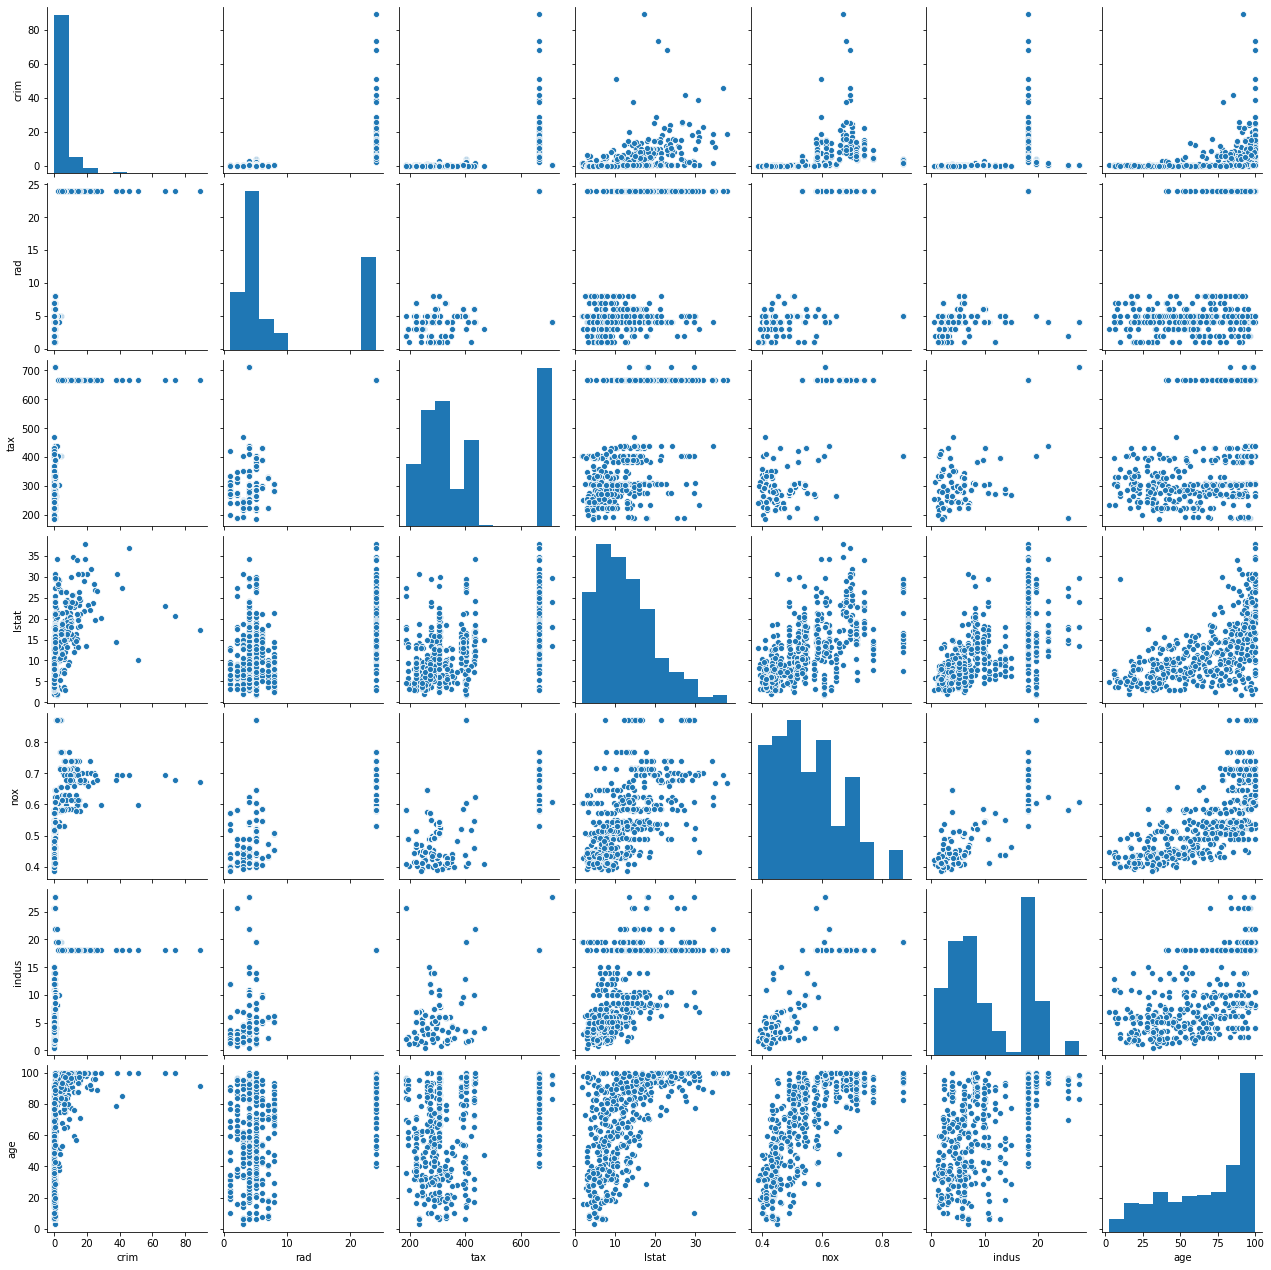

In [ ]:
boston_a=boston[['crim','rad','tax','lstat','nox','indus','age']]
sns.pairplot(boston_a)

#####**(d) Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.**

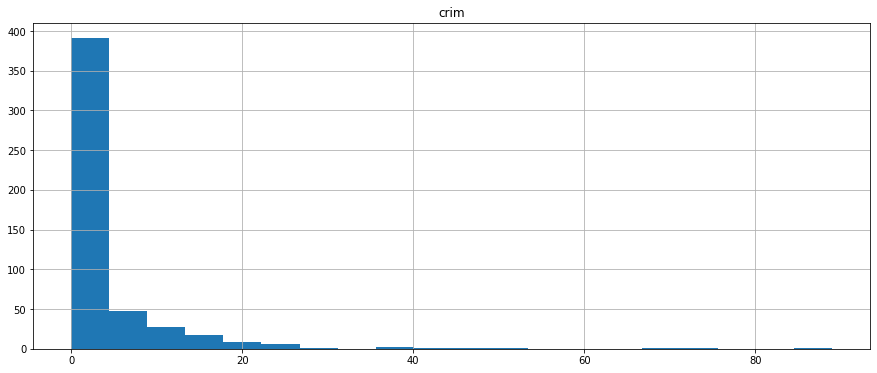

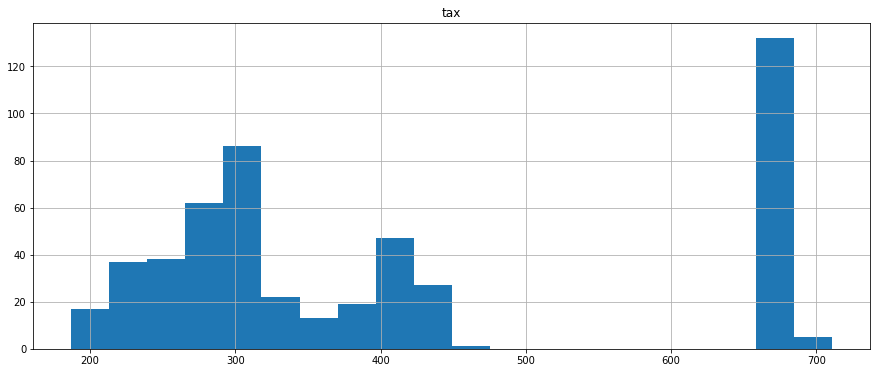

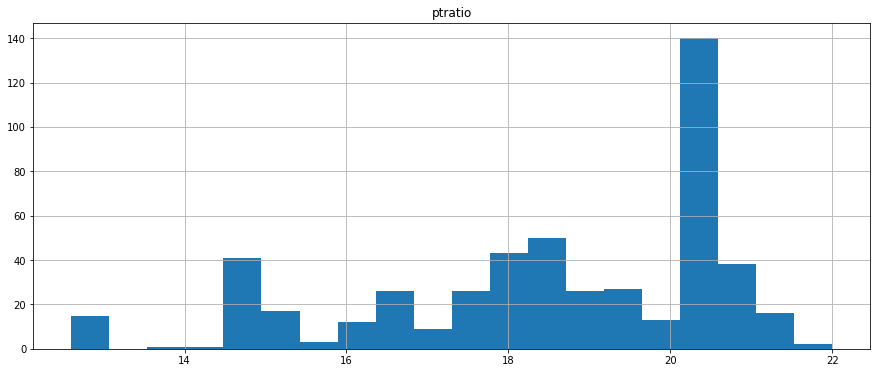

In [ ]:
#Using histogram to show the distribution of 'crim', 'tax', and 'ptratio' data
columns=boston[['crim','tax','ptratio']]

for i in columns:
  boston.hist(column=i,bins=20,figsize=(15,6))
  plt.show()

> **ANSWER**

> It is shown in the histogram with relatively high bar that there are suburbs with particularly high crime rates, tax rates, and pupil-teacher ratios. 
* About ±380 suburbs has 0 crime rates
* Around 130 suburbs has full-value property-tax rate ±680 per USD10,000
* There are 140 suburbs that has ±20.04 Pupil-teacher Ratio

#####**(e) How many of the suburbs in this data set bound the Charles river?**

In [ ]:
#Examine this by showing chas column's unique value's counts:
boston.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

> **ANSWER**

> From the results of value_counts() above, value 1, which represents suburb bound the Charles river, appeared 35 times, means that **there are 35 suburbs bound to the Charles river**.

#####**(f) What is the median pupil-teacher ratio among the towns in this data set?**

In [ ]:
print("The Median of Pupil-Teacher Ratio among the Towns is: ",boston['ptratio'].median())

The Median of Pupil-Teacher Ratio among the Towns is:  19.05


#####**(g) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.**

In [ ]:
lowest_medv=boston['medv'].min()
print("Suburb of Boston with Lowest Median Value of Owner-occupied Homes (MEDV) is: ",lowest_medv)

Suburb of Boston with Lowest Median Value of Owner-occupied Homes (MEDV) is:  5.0


In [ ]:
print("The Suburbs' Predictors with Lowest MEDV:")
lowest_medv_df=boston.loc[boston.medv==5.0]
lowest_medv_df

The Suburbs' Predictors with Lowest MEDV:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [ ]:
print("The Values of Other Predictors for Lowest MEDV Suburb:")
lowest_medv_values=boston.loc[boston['medv']==lowest_medv]
lowest_medv_values_range=lowest_medv_values.describe().drop(['count','std','25%','50%','75%'])
lowest_medv_values_range

The Values of Other Predictors for Lowest MEDV Suburb:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
mean,53.1363,0.0,18.1,0.0,0.693,5.568,100.0,1.4575,24.0,666.0,20.2,390.935,26.785,5.0
min,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4254,24.0,666.0,20.2,384.970,22.980,5.0
max,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4896,24.0,666.0,20.2,396.900,30.590,5.0


In [ ]:
print("The Values of Predictors in the Full Dataset:")
full_dataset_range=boston.describe().drop(['count','std','25%','50%','75%'])
full_dataset_range

The Values of Predictors in the Full Dataset:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
mean,3.613524,11.363636,11.136779,0.06917,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
min,0.006320,0.000000,0.460000,0.00000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
max,88.976200,100.000000,27.740000,1.00000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
x=

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
mean,-49.522776,11.363636,-6.963221,0.06917,-0.138305,0.716634,-31.425099,2.337543,-14.450593,-257.762846,-1.744466,-34.260968,-14.131937,17.532806
min,-38.345480,0.000000,-17.640000,0.00000,-0.308000,-1.892000,-97.100000,-0.295800,-23.000000,-479.000000,-7.600000,-384.650000,-21.250000,0.000000
max,21.055400,100.000000,9.640000,1.00000,0.178000,3.097000,0.000000,10.636900,0.000000,45.000000,1.800000,0.000000,7.380000,45.000000


> **ANSWER**

> 

#####**(h) In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.**

In [ ]:
sevenrooms=boston.loc[boston.rm>7]
sevenrooms

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [ ]:
sevenrooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.979109,28.171875,5.775625,0.125000,0.504455,7.570094,60.640625,4.199617,5.984375,312.234375,16.259375,388.275156,5.474063,38.396875
std,2.807599,34.053089,5.544494,0.333333,0.092863,0.481467,27.858587,2.074423,5.655429,118.311365,2.351407,9.487005,2.906582,8.722639
min,0.009060,0.000000,0.460000,0.000000,0.394000,7.007000,8.400000,1.202400,1.000000,193.000000,12.600000,354.310000,1.730000,15.000000
25%,0.045023,0.000000,2.460000,0.000000,0.430250,7.183250,36.000000,2.444925,3.000000,244.750000,14.700000,384.922500,3.555000,32.975000
50%,0.097860,20.000000,3.970000,0.000000,0.488000,7.414000,63.800000,3.495200,5.000000,273.000000,17.400000,390.660000,4.775000,36.450000
75%,0.542893,45.000000,6.200000,0.000000,0.582500,7.858500,85.025000,5.462925,7.000000,329.000000,17.925000,395.305000,6.590000,46.175000
max,19.609100,95.000000,19.580000,1.000000,0.718000,8.780000,100.000000,9.222900,24.000000,666.000000,20.200000,396.900000,16.740000,50.000000


In [ ]:
print("Number of Suburbs with Average of >7 Rooms per Dwelling is: ",(boston['rm']>7).sum())

Number of Suburbs with Average of >7 Rooms per Dwelling is:  64


In [ ]:
eightrooms=boston.loc[boston.rm>8]
eightrooms.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0


In [ ]:
eightrooms.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [ ]:
print("Number of Suburbs with Average of >8 Rooms per Dwelling is: ",(boston['rm']>8).sum())

Number of Suburbs with Average of >8 Rooms per Dwelling is:  13
